# Ejercicio de filtros espaciales y morfológicos
**Autores:**
- Cervantes Ramírez, Salvador Fernando
- Guerrero Deschamps, Raúl

**Fecha:** 19/07/2021  
**Asignatura:** Percepción Computacional  
**Notebook:**   
**GitHub:** 

### Descripción del problema
Crearemos un lector de códigos VIN de automóviles que solamente requiera una cámara en lugar de algún lector especializado.

### Solución propuesta
Al capturar una foto del VIN en el parabrisas de un automóvil, aplicaremos diferentes filtros espaciales y morfológicos los cuales ayudarán a identificar exclusivamente los números y letras del código VIN para su posterior procesamiento.  
Esta solución incluirá 3 pasos:
1. Localizar la región de la foto donde se encuentre la calcomanía o placa donde está impreso el código VIN utilizando detección de bordes con el algoritmo Canny.
2. Extraer la región donde se encuentra el código VIN mediante la identificación de objetos rectangulares usando aproximación de contornos y corrección de perspectiva, donde el objeto rectangular más grande es donde se encuentra el código VIN.
3. Limpiar de ruido no local (NLM) para eliminar ruido en el brillo y contraste de la foto y resaltar los dígitos del código VIN mediante el filtro morfológico tipo abierto, donde se eliminan pequeñas imperfecciones y resaltan las letras y digitos para su posterior reconocimiento de texto (OCR fuera del alcance de este trabajo).

### Ejecución comentada paso a paso

Se incluyen las librerías para leer y escribir imágenes, al igual que la librería OpenCV para aplicar las diferentes operaciones de corrección y filtrado espacial y morfológico, y la libreria imutils para operaciones básicas de transformaciones sobre imágenes.

In [54]:
import cv2 as cv
from PIL import Image as im
from IPython.display import Image
from IPython.display import display

Tomamos foto de un parabrisas donde la placa del código VIN está visible.

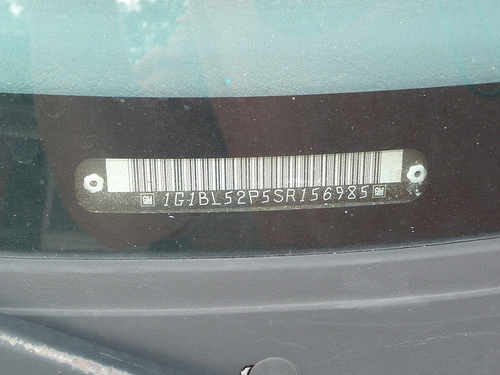

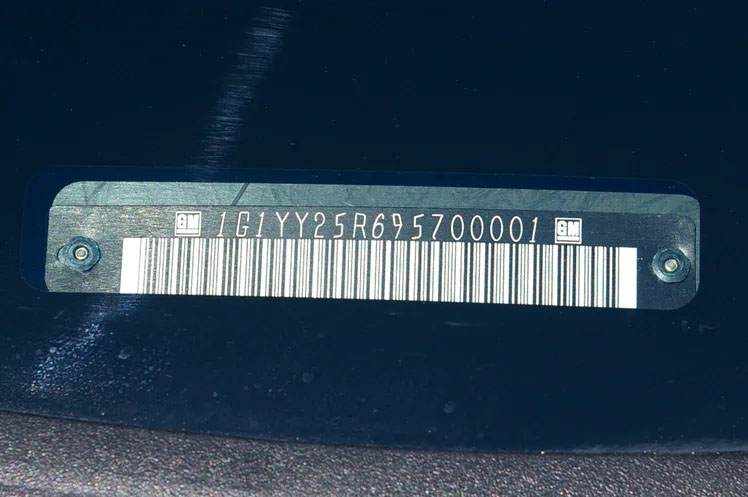

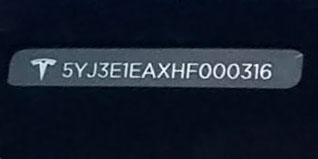

In [55]:
display(Image("vins/1.jpg"))
display(Image("vins/2.jpg"))
display(Image("vins/3.jpg"))

Eliminamos ruido de la imagen con un filtro gaussiano y de mediana, después se aplica el algoritmo Canny para la detección de bordes.

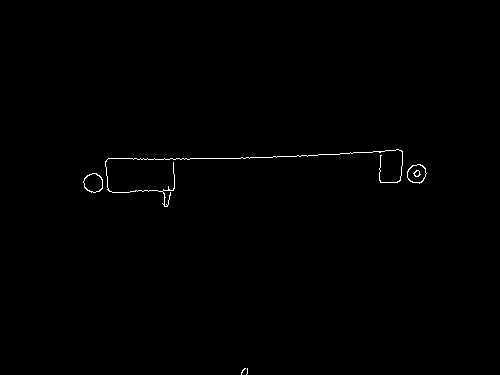

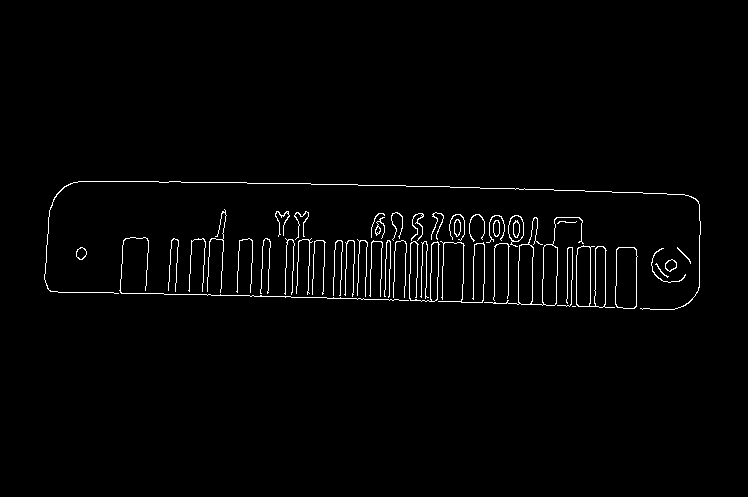

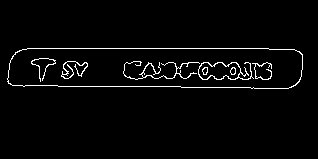

In [56]:
foto1 = cv.imread("vins/1.jpg", cv.IMREAD_GRAYSCALE)
foto2 = cv.imread("vins/2.jpg", cv.IMREAD_GRAYSCALE)
foto3 = cv.imread("vins/3.jpg", cv.IMREAD_GRAYSCALE)
def deteccionDeBordes(foto):
    blurGaussiano = cv.GaussianBlur(foto, (9, 9), 0)
    blurMediana = cv.medianBlur(blurGaussiano, 5, 0)
    bordesCanny = cv.Canny(blurMediana, 50, 200, 255)
    display(im.fromarray(bordesCanny))
    return bordesCanny
bordesCanny1 = deteccionDeBordes(foto1)
bordesCanny2 = deteccionDeBordes(foto2)
bordesCanny3 = deteccionDeBordes(foto3)

Identificamos y extraemos la región donde se encuentra el VIN buscando contornos rectangulares

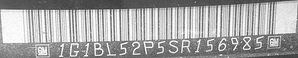

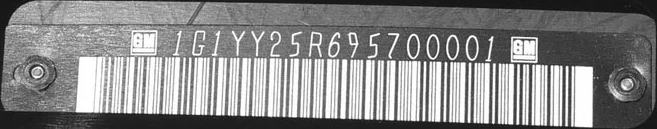

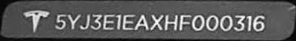

In [57]:
def extraccionDeRegion(foto, bordesCanny):
    contornos, jerarquia = cv.findContours(bordesCanny,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)[-2:]
    i = 0
    for cnt in contornos:
        i += 1
        x,y,w,h = cv.boundingRect(cnt)
        fotoLimpiaRecortada = foto[y:y+h,x:x+w]
    display(im.fromarray(fotoLimpiaRecortada))
    return fotoLimpiaRecortada
fotoLimpiaRecortada1 = extraccionDeRegion(foto1, bordesCanny1)
fotoLimpiaRecortada2 = extraccionDeRegion(foto2, bordesCanny2)
fotoLimpiaRecortada3 = extraccionDeRegion(foto3, bordesCanny3)

Por último, se aplica un filtro NLM para corregir ruido de brillo y contraste que puedan afectar a las operaciones morfológicas, y finalmente se aplica un filtro morfológico de tipo abierto que elimina pequeñas imperfecciones y resalta las letras y digitos del codigo VIN.

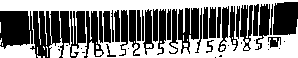

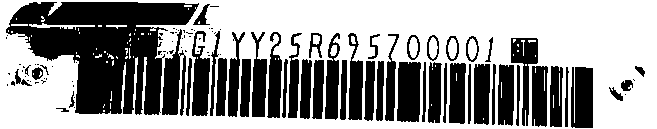

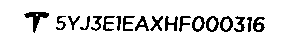

In [58]:
def resalteOperacionMorfologica(fotoLimpiaRecortada):
    fotoSegundoPaseDenoising = cv.fastNlMeansDenoising(fotoLimpiaRecortada, None, 15,15,21)
    mascara = cv.threshold(fotoSegundoPaseDenoising, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (1,2))
    mascara = cv.morphologyEx(mascara, cv.MORPH_OPEN, kernel)
    display(im.fromarray(mascara))
    return mascara
fotoParaOCR1 = resalteOperacionMorfologica(fotoLimpiaRecortada1)
fotoParaOCR2 = resalteOperacionMorfologica(fotoLimpiaRecortada2)
fotoParaOCR3 = resalteOperacionMorfologica(fotoLimpiaRecortada3)